# Telco Churn Insights Report (For Churned Customers Only)

#  Import libraries

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 0️⃣ Save folder setup

In [49]:
save_folder = r"D:\My Work\Data science\TELCO_1"
os.makedirs(save_folder, exist_ok=True)

# 1️⃣ Load CSV

In [50]:
file_path = r"D:\My Work\Data science\TELCO_1\telco.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Strip spaces

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0      

# 2️⃣ Basic info

In [51]:
print("\nDataset shape:", df.shape)
print("\nChurn Label distribution:")
print(df['Churn Label'].value_counts())


Dataset shape: (7043, 50)

Churn Label distribution:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


# 3️⃣ Top Churn Categories


Top Churn Categories:
Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64


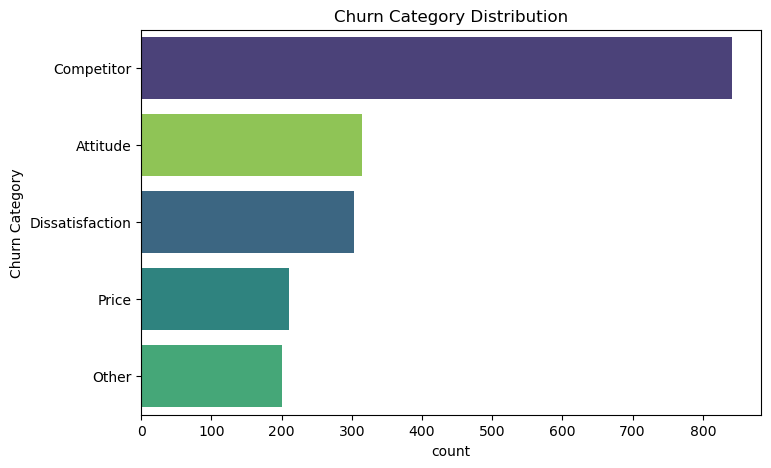

In [52]:
top_categories = df['Churn Category'].value_counts()
print("\nTop Churn Categories:")
print(top_categories)

plt.figure(figsize=(8,5))
ax = sns.countplot(
    y='Churn Category',
    data=df,
    order=top_categories.index,
    hue='Churn Category' if len(top_categories) > 1 else None,
    dodge=False,
    palette='viridis'
)
legend = ax.get_legend()
if legend:
    legend.remove()
plt.title("Churn Category Distribution")
plt.savefig(os.path.join(save_folder, "churn_category_distribution.png"), bbox_inches='tight')
plt.show()

# 4️⃣ Top Churn Reasons


Top 10 Churn Reasons:
Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Name: count, dtype: int64


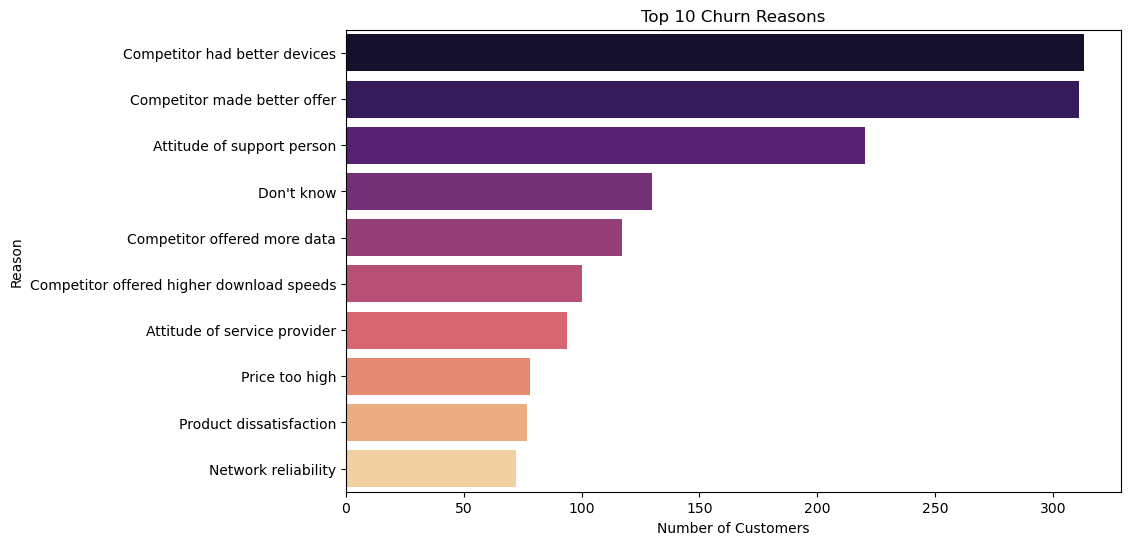

In [53]:
top_reasons = df['Churn Reason'].value_counts().head(10)
print("\nTop 10 Churn Reasons:")
print(top_reasons)

reasons_df = top_reasons.reset_index()
reasons_df.columns = ['Churn Reason', 'Count']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='Count',
    y='Churn Reason',
    data=reasons_df,
    hue='Churn Reason' if len(reasons_df) > 1 else None,
    dodge=False,
    palette='magma'
)
legend = ax.get_legend()
if legend:
    legend.remove()
plt.title("Top 10 Churn Reasons")
plt.xlabel("Number of Customers")
plt.ylabel("Reason")
plt.savefig(os.path.join(save_folder, "top_10_churn_reasons_colored.png"), bbox_inches='tight')
plt.show()


# 5️⃣ Revenue Analysis


Revenue Statistics:
count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: Total Revenue, dtype: float64


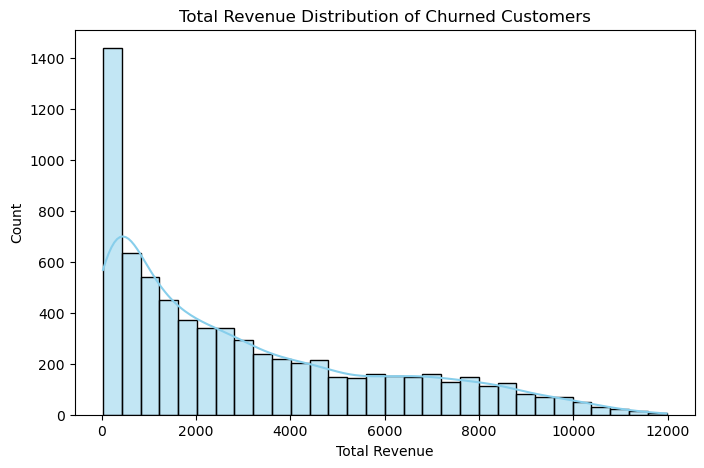

In [54]:
print("\nRevenue Statistics:")
print(df['Total Revenue'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df['Total Revenue'], bins=30, kde=True, color='skyblue')
plt.title("Total Revenue Distribution of Churned Customers")
plt.xlabel("Total Revenue")
plt.savefig(os.path.join(save_folder, "revenue_distribution.png"), bbox_inches='tight')
plt.show()


# 6️⃣ Tenure Analysis


Tenure Statistics:
count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure in Months, dtype: float64


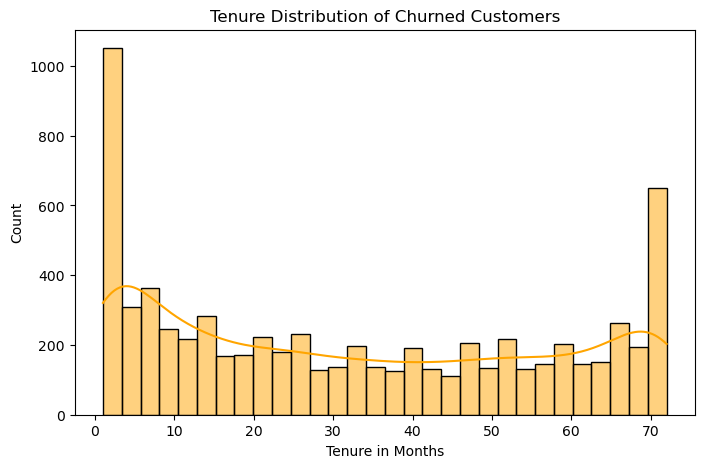

In [55]:
print("\nTenure Statistics:")
print(df['Tenure in Months'].describe())

plt.figure(figsize=(8,5))
sns.histplot(df['Tenure in Months'], bins=30, kde=True, color='orange')
plt.title("Tenure Distribution of Churned Customers")
plt.xlabel("Tenure in Months")
plt.savefig(os.path.join(save_folder, "tenure_distribution.png"), bbox_inches='tight')
plt.show()

# 7️⃣ Satisfaction Score Analysis


Satisfaction Score Statistics:
Satisfaction Score
1     922
2     518
3    2665
4    1789
5    1149
Name: count, dtype: int64


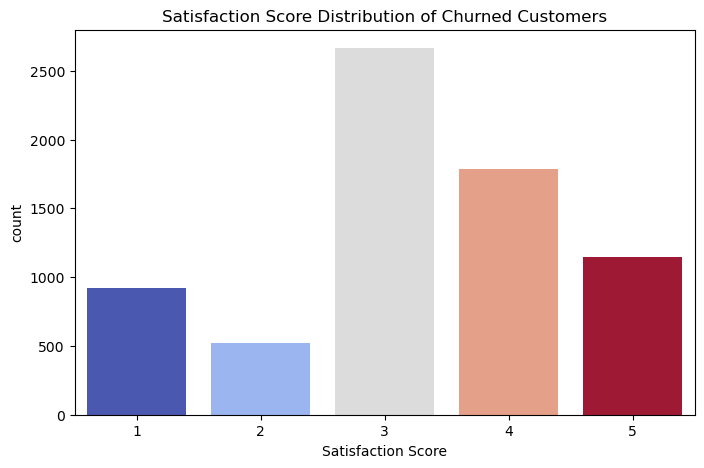

In [56]:
print("\nSatisfaction Score Statistics:")
print(df['Satisfaction Score'].value_counts().sort_index())

plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='Satisfaction Score', 
    data=df,
    hue='Satisfaction Score' if df['Satisfaction Score'].nunique() > 1 else None,
    dodge=False,
    palette='coolwarm'
)
legend = ax.get_legend()
if legend:
    legend.remove()
plt.title("Satisfaction Score Distribution of Churned Customers")
plt.savefig(os.path.join(save_folder, "satisfaction_score_distribution_colored.png"), bbox_inches='tight')
plt.show()

# 8️⃣ Top 10 States with Churned Customers

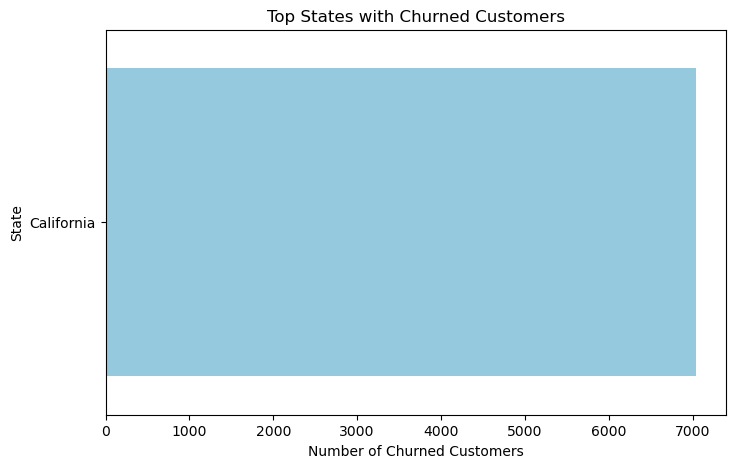

In [57]:
# Top States with Churned Customers
top_states = df['State'].value_counts().head(10)
states_df = top_states.reset_index()
states_df.columns = ['State', 'Count']

plt.figure(figsize=(8,5))

# Use hue only if multiple states, else color
if len(states_df) > 1:
    ax = sns.barplot(
        x='Count',
        y='State',
        data=states_df,
        hue='State',
        dodge=False,
        palette='Set2'
    )
else:
    ax = sns.barplot(
        x='Count',
        y='State',
        data=states_df,
        color='skyblue'
    )

# Remove legend if exists
legend = ax.get_legend()
if legend:
    legend.remove()

plt.title("Top States with Churned Customers")
plt.xlabel("Number of Churned Customers")
plt.ylabel("State")
plt.savefig(os.path.join(save_folder, "top_states_churn_colored.png"), bbox_inches='tight')
plt.show()


In [58]:
print("\nChurn insights report completed successfully.")
print("All plots saved in:", save_folder)


Churn insights report completed successfully.
All plots saved in: D:\My Work\Data science\TELCO_1


# 9️⃣ Random Forest Model Training

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # ✅ এটা থাকতে হবে
import joblib

# Select important features
columns_to_keep = ['Satisfaction Score', 'Tenure in Months', 'Monthly Charge', 'Churn Label']
data = df[columns_to_keep].copy()
data.columns = ['Satisfaction_Score', 'Tenure_in_Months', 'Monthly_Charge', 'Churn']

# Convert target to numeric
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Check classes
print("Classes in Churn column:\n", data['Churn'].value_counts())
if data['Churn'].nunique() < 2:
    raise ValueError("Churn column has only one class. ML model cannot be trained!")

# Features & target
X = data.drop('Churn', axis=1)
y = data['Churn']
# Train-test split (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# Model accuracy
predictions = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")

# Save model & columns
joblib.dump(model, os.path.join(save_folder, 'churn_model_final.pkl'))
joblib.dump(list(X.columns), os.path.join(save_folder, 'model_columns.pkl'))
print("Model and column list have been successfully saved in:", save_folder)


Classes in Churn column:
 Churn
0    5174
1    1869
Name: count, dtype: int64
Model Accuracy: 93.47%
Model and column list have been successfully saved in: D:\My Work\Data science\TELCO_1
